In [1]:
# importing dependencies
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [2]:
# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
print("Path to dataset files:", path)

Path to dataset files: /home/ameyagurjar/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [3]:
# Reading the data
df = pd.read_csv(os.path.join(path, 'books.csv'))
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
print(f"The dataset has {df.shape[0]} rows.")
print(f"The dataset has {df.shape[1]} cols.")

The dataset has 6810 rows.
The dataset has 12 cols.


## How many missing values do we have?

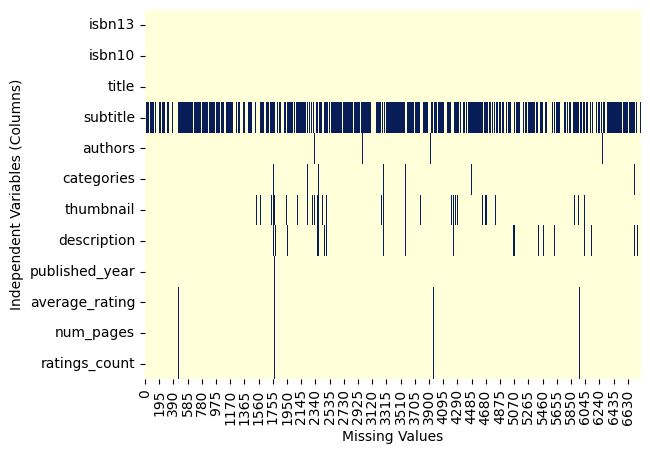

In [5]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar = False, ax = ax, cmap = "YlGnBu")
plt.xlabel("Missing Values")
plt.ylabel("Independent Variables (Columns)")
plt.show()

#### Subtitles are missing for almost all the datapoints, but for "average rating", "num pages" and "ratings count"; if one of them is missing then all of them are missing.

## Why are all three of them missing together? Is there a correlation?

Text(0.5, 1.0, 'Correlation Heatmap')

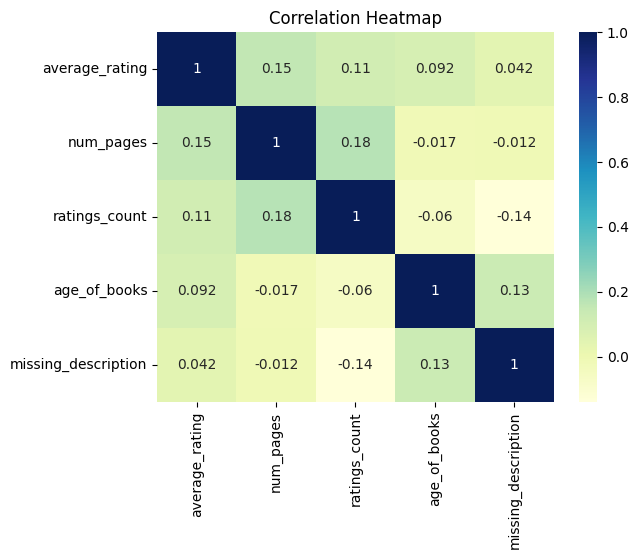

In [6]:
# check how many books have missing description
df["missing_description"] = np.where(df["description"].isna(), 1, 0)
# age of the books
df["age_of_books"] = 2025 - df["published_year"]
# pick out these columns 
cols = ["average_rating", "num_pages", "ratings_count", "age_of_books", "missing_description"]
# check corelation between these cols
corr_matrix = df[cols].corr(method = "spearman")
# plot the correlation matrix
sns.heatmap(corr_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Heatmap")

### These three cols have low correlation with the age of the books and whether the description is missing. 

## How many books do we have in the dataset that don't have either the publishing year, the description, the no. of pages, or the rating?

In [7]:
df[
    (df["description"].isna()) |
    (df["num_pages"].isna()) |
    (df["average_rating"].isna())|
    (df["published_year"].isna())
].shape

(303, 14)

In [8]:
df_new = df[
    ~(df["description"].isna()) &
    ~(df["num_pages"].isna()) &
    ~(df["average_rating"].isna())&
    ~(df["published_year"].isna())
]

In [9]:
df_new.shape

(6507, 14)

In [10]:
df_new.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0


### We remove the rows that don't have either of these four values

## How many categories do we have?

In [11]:
unique_categories_count = len(df_new.categories.unique())
print(f"No. of unique categories in the dataset: {unique_categories_count}")

No. of unique categories in the dataset: 532


In [12]:
df_new.categories.value_counts().reset_index().sort_values("count", ascending = False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,"Adventure stories, English",1
518,Germany,1
517,Egypt,1
516,Apartments,1


#### Most categories have only a few books, while most books are in the first four categories.

## How many words does each description have?

In [13]:
df_new["no. of words in description"] = df_new["description"].str.split().str.len()

/tmp/ipykernel_21630/4022732385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["no. of words in description"] = df_new["description"].str.split().str.len()


In [14]:
df_new.head(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,no. of words in description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14


<Axes: xlabel='no. of words in description', ylabel='Count'>

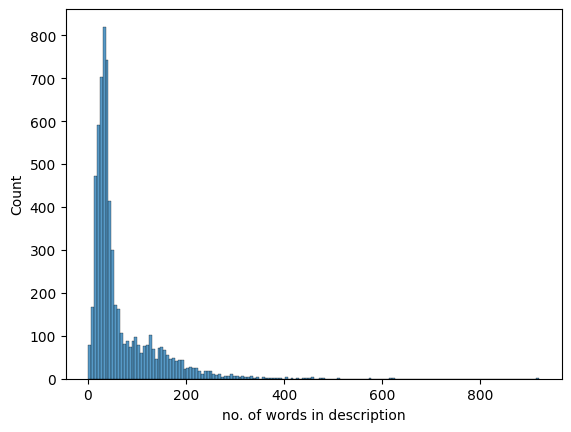

In [15]:
sns.histplot(data = df_new, x = "no. of words in description")

#### Descriptions with very few words should be pruned as they won't help the model learn. 

## How do determine the pruning threshold?

In [16]:
df_new.loc[df_new["no. of words in description"].between(25, 34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

## Books with descriptions of more than 25 words will be kept.

In [17]:
df_new_desc_filtered = df_new[df_new["no. of words in description"] >= 25]

In [18]:
df_new_desc_filtered.shape

(5197, 15)

In [19]:
df_new_desc_filtered.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,no. of words in description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205


#### Since, the subtitles column was mostly empty, we join the title and subtitles column since they are always paired.

In [20]:
df_new_desc_filtered["title and subtitle"] = np.where(
    df_new_desc_filtered["subtitle"].isna(),
    df_new_desc_filtered["title"],
    df_new_desc_filtered["title"] + ": " + df_new_desc_filtered["subtitle"]
)

/tmp/ipykernel_21630/756899035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_desc_filtered["title and subtitle"] = np.where(


In [21]:
df_new_desc_filtered.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,no. of words in description,title and subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel


#### Combine the isbn and the descriptions as well

In [22]:
df_new_desc_filtered["tagged description"] = df_new_desc_filtered["isbn13"].astype(str) + " " + df_new_desc_filtered["description"].astype(str)

/tmp/ipykernel_21630/895355052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_desc_filtered["tagged description"] = df_new_desc_filtered["isbn13"].astype(str) + " " + df_new_desc_filtered["description"].astype(str)


#### Finally, we drop all the unimportant columns and write to a csv

In [23]:
df_new_desc_filtered.drop(["subtitle", "missing_description", "no. of words in description", "age_of_books"], axis = 1, inplace = True)

/tmp/ipykernel_21630/2876863451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_desc_filtered.drop(["subtitle", "missing_description", "no. of words in description", "age_of_books"], axis = 1, inplace = True)


In [24]:
df_new_desc_filtered.columns

Index(['isbn13', 'isbn10', 'title', 'authors', 'categories', 'thumbnail',
       'description', 'published_year', 'average_rating', 'num_pages',
       'ratings_count', 'title and subtitle', 'tagged description'],
      dtype='object')

In [25]:
df_new_desc_filtered.to_csv("books_cleaned.csv", index = False)